**About this file**


The dataset contains the following features:

**PatientID**: Unique identifier for each patient.

**State:** Geographic state of residence.

**Sex:** Gender of the patient.

**GeneralHealth:** Self-reported health status.

**AgeCategory:** Categorized age group of the patient.

**eightInMeters:** Height of the patient (in meters).

**WeightInKilograms:** Weight of the patient (in kilograms).

**BMI:** Body Mass Index, calculated from height and weight.

**HadHeartAttack:** Indicator of whether the patient had a heart attack.

**HadAngina:** Indicator of whether the patient experienced angina.

**HadStroke:** Indicator of whether the patient had a stroke.

**HadAsthma:** Indicator of whether the patient has asthma.

**HadSkinCancer:** Indicator of whether the patient had skin cancer.

**HadCOPD:** Indicator of whether the patient had chronic obstructive pulmonary disease (COPD).

**HadDepressiveDisorder:** Indicator of whether the patient was diagnosed with a depressive disorder.

**HadKidneyDisease:** Indicator of whether the patient had kidney disease.

**HadArthritis:** Indicator of whether the patient had arthritis.

**HadDiabetes:** Indicator of whether the patient had diabetes.

**DeafOrHardOfHearing:** Indicator of hearing impairment.

**BlindOrVisionDifficulty:** Indicator of vision impairment.

**DifficultyConcentrating:** Indicator of concentration difficulties.

**DifficultyWalking:** Indicator of walking difficulties.

**DifficultyDressingBathing:** Indicator of difficulties in dressing or bathing.

**DifficultyErrands:** Indicator of difficulties in running errands.

**SmokerStatus:** Status of whether the patient is a smoker.

**ECigaretteUsage:** Indicator of e-cigarette usage.

**ChestScan:** Indicator of whether the patient had a chest scan.

**RaceEthnicityCategory:** Race or ethnicity of the patient.

**AlcoholDrinkers:** Status of whether the patient consumes alcohol.

**HIVTesting:** Status of whether the patient was tested for HIV.

**FluVaxLast12** Status of whether the patient received a flu vaccine in the last 12 months.

**PneumoVaxEver:** Status of whether the patient ever received a pneumococcal vaccine.

**TetanusLast10Tdap:** Status of whether the patient received a tetanus vaccine in the last
10 years.

**HighRiskLastYear:** Indicator of whether the patient was at high risk in the last year.

**CovidPos:** Status of whether the patient tested positive for COVID-19.

**This dataset contains both medical history and health-related behavioral features, which are crucial for predicting outcomes like heart disease. It includes general demographic data, lifestyle factors, and specific health conditions.**

In [2]:

import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon




In [3]:
path = pd.read_excel('C:/Users/CPANA/Downloads/archive/Patients Data ( Used for Heart Disease Prediction ).xlsx')

print("Path to dataset files:", path)

Path to dataset files:         PatientID        State     Sex GeneralHealth   AgeCategory  \
0               1      Alabama  Female          Fair  Age 75 to 79   
1               2      Alabama  Female     Very good  Age 65 to 69   
2               3      Alabama    Male     Excellent  Age 60 to 64   
3               4      Alabama    Male     Very good  Age 70 to 74   
4               5      Alabama  Female          Good  Age 50 to 54   
...           ...          ...     ...           ...           ...   
237625     237626  Puerto Rico  Female          Good  Age 60 to 64   
237626     237627  Puerto Rico  Female          Good  Age 55 to 59   
237627     237628  Puerto Rico    Male          Fair  Age 45 to 49   
237628     237629  Puerto Rico  Female     Very good  Age 25 to 29   
237629     237630  Puerto Rico  Female          Good  Age 30 to 34   

        HeightInMeters  WeightInKilograms        BMI  HadHeartAttack  \
0                 1.63          84.820000  32.099998            

In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt = 'g', ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['NO COPD', 'Had COPD']); ax.yaxis.set_ticklabels(['NO COPD', 'Had COPD']) 
    plt.show() 

In [5]:
medical_df = path
medical_df


,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,Not at all (right now),0,Hispanic,0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,Not at all (right now),0,Hispanic,0,1,0,0,"Yes, received Tdap",0,0
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,Not at all (right now),1,Hispanic,0,1,1,1,"Yes, received Tdap",1,0
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,1


In [6]:
encoded_data1 = pd.get_dummies(medical_df, columns=['ECigaretteUsage', 'SmokerStatus'], drop_first=True)
encoded_data1


,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,1,"No, did not receive any tetanus shot in the pa...",0,1,False,False,False,False,True,False
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,1,"Yes, received Tdap",0,0,False,False,False,False,True,False
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,0,"Yes, received tetanus shot but not sure what type",0,0,False,False,False,False,False,True
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,1,"Yes, received tetanus shot but not sure what type",0,0,False,False,False,False,True,False
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,0,"No, did not receive any tetanus shot in the pa...",0,0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,0,"No, did not receive any tetanus shot in the pa...",0,0,True,False,False,False,False,True
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,0,"Yes, received Tdap",0,0,True,False,False,False,True,False
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,1,"Yes, received Tdap",1,0,True,False,False,False,False,False
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,0,"No, did not receive any tetanus shot in the pa...",0,1,False,False,False,False,False,True


In [7]:
medical_df = encoded_data1
medical_df

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,1,"No, did not receive any tetanus shot in the pa...",0,1,False,False,False,False,True,False
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,1,"Yes, received Tdap",0,0,False,False,False,False,True,False
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,0,"Yes, received tetanus shot but not sure what type",0,0,False,False,False,False,False,True
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,1,"Yes, received tetanus shot but not sure what type",0,0,False,False,False,False,True,False
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,0,"No, did not receive any tetanus shot in the pa...",0,0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,0,"No, did not receive any tetanus shot in the pa...",0,0,True,False,False,False,False,True
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,0,"Yes, received Tdap",0,0,True,False,False,False,True,False
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,1,"Yes, received Tdap",1,0,True,False,False,False,False,False
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,0,"No, did not receive any tetanus shot in the pa...",0,1,False,False,False,False,False,True


In [8]:
print(medical_df.columns)

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
       'RaceEthnicityCategory', 'AlcoholDrinkers', 'HIVTesting',
       'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos',
       'ECigaretteUsage_Not at all (right now)',
       'ECigaretteUsage_Use them every day',
       'ECigaretteUsage_Use them some days',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked'],
      dtype='object')


In [58]:
X = medical_df[['ECigaretteUsage_Use them every day', 'SmokerStatus_Current smoker - now smokes some days', 'HadAsthma', 'DifficultyConcentrating']]
X


,ECigaretteUsage_Use them every day,SmokerStatus_Current smoker - now smokes some days,HadAsthma,DifficultyConcentrating
0,False,False,1,0
1,False,False,0,0
2,False,False,0,0
3,False,False,0,0
4,False,False,0,0
...,...,...,...,...
237625,False,False,0,0
237626,False,False,0,0
237627,False,False,0,1
237628,False,False,0,0


In [59]:
transform = preprocessing.StandardScaler() # we define the independant variables
X = transform.fit_transform(X)
X

array([[-0.15751371, -0.1854284 ,  2.39442143, -0.34671975],
       [-0.15751371, -0.1854284 , -0.41763742, -0.34671975],
       [-0.15751371, -0.1854284 , -0.41763742, -0.34671975],
       ...,
       [-0.15751371, -0.1854284 , -0.41763742,  2.88417373],
       [-0.15751371, -0.1854284 , -0.41763742, -0.34671975],
       [-0.15751371, -0.1854284 , -0.41763742, -0.34671975]])

In [60]:
Y = medical_df['HadCOPD'] # we want to predict if those conditions affect COPD
Y.to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

In [62]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['newton-cg']}

lr = LogisticRegression(class_weight= 'balanced')
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['newton-cg']})

In [63]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.7572456669716467


In [64]:
logreg_cv.score(X_test, Y_test)

0.7555303062183507

In [67]:
y_pred=logreg_cv.predict(X_test)
y_pred

Y_pred_train = logreg_cv.predict(X_train)

mse_test = mean_squared_error(Y_test, y_pred)
mse_train = mean_squared_error(Y_train,Y_pred_train)



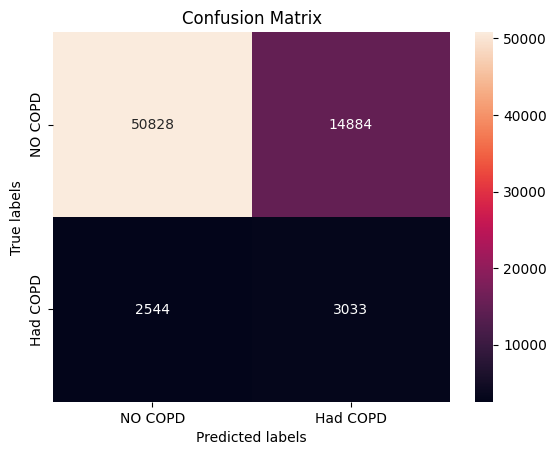

In [68]:
plot_confusion_matrix(Y_test, y_pred)


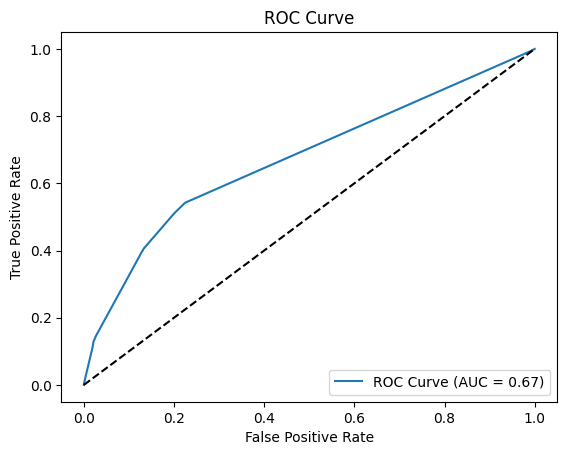

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = logreg_cv.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = roc_auc_score(Y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [70]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     65712
           1       0.17      0.54      0.26      5577

    accuracy                           0.76     71289
   macro avg       0.56      0.66      0.56     71289
weighted avg       0.89      0.76      0.81     71289



In [71]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Balancear las clases con SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Entrenar el modelo con datos balanceados
lr = LogisticRegression(solver='lbfgs', penalty='l2', class_weight='balanced')
lr.fit(X_train_resampled, Y_train_resampled)

# Predicciones
y_pred_resampled = lr.predict(X_test)

# Métricas
print(classification_report(Y_test, y_pred_resampled))
print(confusion_matrix(Y_test, y_pred_resampled))


              precision    recall  f1-score   support

           0       0.95      0.77      0.85     65712
           1       0.17      0.54      0.26      5577

    accuracy                           0.75     71289
   macro avg       0.56      0.66      0.56     71289
weighted avg       0.89      0.75      0.81     71289

[[50737 14975]
 [ 2542  3035]]


Because of the model is failing to predict one of the classes we have to get manually the weights

In [72]:
class_weights = {0: len(Y_train) / (2 * np.bincount(Y_train)[0]),  # Peso de la clase 0
                 1: len(Y_train) / (2 * np.bincount(Y_train)[1])}  # Peso de la clase 1

# Imprimimos los pesos calculados
print("Class Weights:", class_weights)

lr = LogisticRegression(class_weight=class_weights)


logreg_cv.fit(X_train, Y_train)

# WE try to get the prediction
y_pred = logreg_cv.predict(X_test)

# Calculate MSE
Y_pred_train = logreg_cv.predict(X_train)
mse_test = mean_squared_error(Y_test, y_pred)
mse_train = mean_squared_error(Y_train, Y_pred_train)

# Print the results 
print("Test Predictions:", y_pred)
print("Trained MSE:", mse_train, "Test MSE:", mse_test)
print("Best Parameters:", logreg_cv.best_params_)

Class Weights: {0: np.float64(0.5424776279057633), 1: np.float64(6.385451055662188)}
Test Predictions: [0 0 0 ... 1 1 0]
Trained MSE: 0.24224935524013924 Test MSE: 0.24446969378164934
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


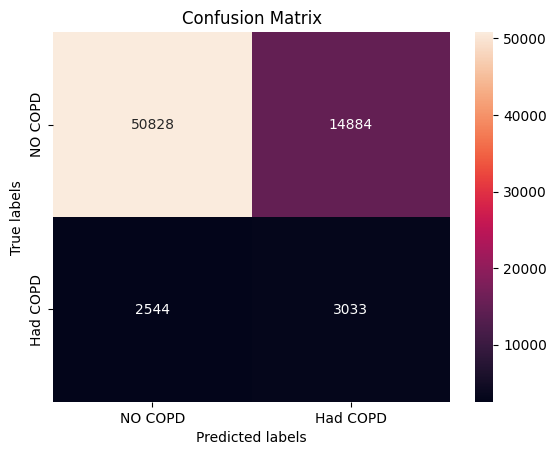

In [73]:
plot_confusion_matrix(Y_test, y_pred)

In [74]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     65712
           1       0.17      0.54      0.26      5577

    accuracy                           0.76     71289
   macro avg       0.56      0.66      0.56     71289
weighted avg       0.89      0.76      0.81     71289



In [75]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 

transform = StandardScaler()  
X = transform.fit_transform(X)

Y = medical_df['HadCOPD']  
Y.to_numpy()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 2)


smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)


print(f"Distribución de clases antes de SMOTE: {np.bincount(Y_train)}")
print(f"Distribución de clases después de SMOTE: {np.bincount(Y_train_smote)}")


lr = LogisticRegression(solver='newton-cg')

parameters = {'C': [0.01, 0.1, 1],
              'penalty': ['l2'],
              'solver': ['newton-cg']}


logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train_smote, Y_train_smote)

y_pred = logreg_cv.predict(X_test)

# Calculamos el MSE
Y_pred_train = logreg_cv.predict(X_train_smote)
mse_test = mean_squared_error(Y_test, y_pred)
mse_train = mean_squared_error(Y_train_smote, Y_pred_train)

# Imprimimos los resultados
print("Test Predictions:", y_pred)
print("Trained MSE:", mse_train, "Test MSE:", mse_test)
print("Best Parameters:", logreg_cv.best_params_)


Distribución de clases antes de SMOTE: [153305  13036]
Distribución de clases después de SMOTE: [153305 153305]
Test Predictions: [0 0 0 ... 0 0 1]
Trained MSE: 0.34210886794298945 Test MSE: 0.24270224017730646
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


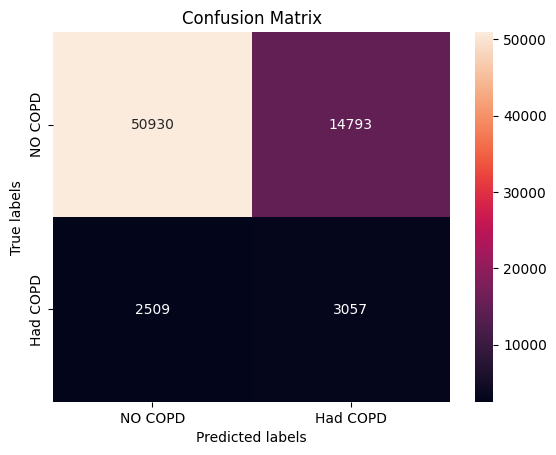

              precision    recall  f1-score   support

           0       0.95      0.77      0.85     65723
           1       0.17      0.55      0.26      5566

    accuracy                           0.76     71289
   macro avg       0.56      0.66      0.56     71289
weighted avg       0.89      0.76      0.81     71289



In [76]:
plot_confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))


At this point is clear that another model might be important to treat imbalanced data. Or we can try with different variables in order to get the predicted variable right

In [89]:
eCigarette_df = medical_df[['ECigaretteUsage_Use them every day', 'HadAsthma', 'HadCOPD', 'DifficultyConcentrating' , 'HadDepressiveDisorder'
]]
eCigarette_df = eCigarette_df[eCigarette_df['ECigaretteUsage_Use them every day'] == True]

X = eCigarette_df.drop(columns=['ECigaretteUsage_Use them every day','HadCOPD']) #We dropped here the column because the data frame is alradu filtred with all the individuals that used Ecigarttes everyday

COPD_Filtered = medical_df[['ECigaretteUsage_Use them every day', 'HadCOPD']]
COPD_Filtered = COPD_Filtered[COPD_Filtered['ECigaretteUsage_Use them every day']== True]

Y = COPD_Filtered.drop(columns='ECigaretteUsage_Use them every day')


In [90]:
print(X.head())
print(X.shape)

     HadAsthma  DifficultyConcentrating  HadDepressiveDisorder
38           0                        0                      1
161          0                        0                      0
168          0                        1                      0
203          0                        0                      0
281          0                        1                      0
(5753, 3)


In [91]:
Y = Y.to_numpy().ravel()

In [92]:
transform = preprocessing.StandardScaler() # we define the independant variables
X = transform.fit_transform(X)
X

array([[-0.48457645, -0.60888505,  1.1606917 ],
       [-0.48457645, -0.60888505, -0.86155523],
       [-0.48457645,  1.64234612, -0.86155523],
       ...,
       [-0.48457645, -0.60888505, -0.86155523],
       [ 2.06365785,  1.64234612,  1.1606917 ],
       [-0.48457645, -0.60888505,  1.1606917 ]])

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 2)

parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['newton-cg']}

lr = LogisticRegression(class_weight= 'balanced')
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)



GridSearchCV(cv=10, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['newton-cg']})

In [94]:
y_pred = logreg_cv.predict(X_test)
mse_test = mean_squared_error(Y_test, y_pred)

print("Test Predictions:", y_pred)
print("Trained MSE:", mse_train, "Test MSE:", mse_test)
print("Best Parameters:", logreg_cv.best_params_)

Test Predictions: [0 0 1 ... 0 0 0]
Trained MSE: 0.36615566037735847 Test MSE: 0.33796698523023455
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


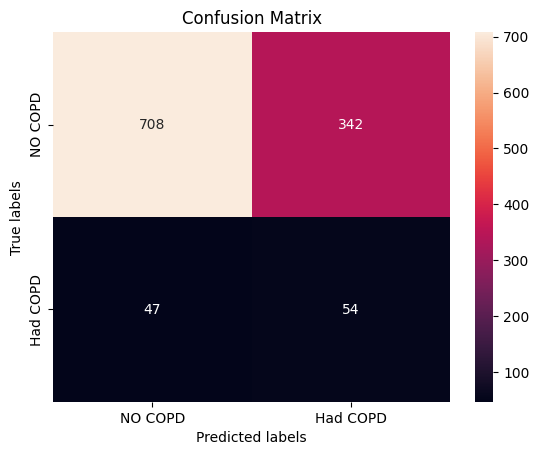

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1050
           1       0.14      0.53      0.22       101

    accuracy                           0.66      1151
   macro avg       0.54      0.60      0.50      1151
weighted avg       0.87      0.66      0.73      1151



In [95]:
plot_confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))

In [96]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Verificar el balance de clases antes y después de SMOTE
print(f"Distribución de clases antes de SMOTE: {np.bincount(Y_train)}")
print(f"Distribución de clases después de SMOTE: {np.bincount(Y_train_smote)}")

# Crear el modelo con regresión logística
lr = LogisticRegression(solver='newton-cg')


# Aplicamos GridSearchCV para encontrar los mejores parámetros

logreg_cv.fit(X_train_smote, Y_train_smote)

# Hacemos predicciones
y_pred = logreg_cv.predict(X_test)

# Calculamos el MSE
Y_pred_train = logreg_cv.predict(X_train_smote)
mse_test = mean_squared_error(Y_test, y_pred)
mse_train = mean_squared_error(Y_train_smote, Y_pred_train)

# Imprimimos los resultados
print("Test Predictions:", y_pred)
print("Trained MSE:", mse_train, "Test MSE:", mse_test)


Distribución de clases antes de SMOTE: [4240  362]
Distribución de clases después de SMOTE: [4240 4240]
Test Predictions: [0 0 1 ... 0 0 0]
Trained MSE: 0.36615566037735847 Test MSE: 0.33796698523023455


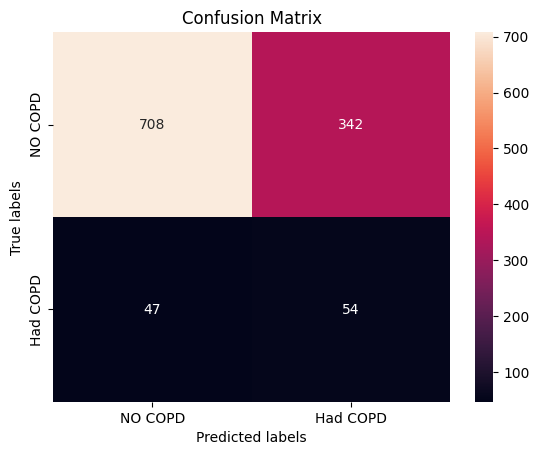

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1050
           1       0.14      0.53      0.22       101

    accuracy                           0.66      1151
   macro avg       0.54      0.60      0.50      1151
weighted avg       0.87      0.66      0.73      1151



In [97]:
plot_confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))

We are going to try now with a decision tree classifier 

In [98]:
parameters = {'criterion': ['gini', 'entropy'], #decision tree parameters
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['sqrt', 'log2', None],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10 )

tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [99]:
Tree_acc = tree_cv.score(X_test, Y_test)
print(Tree_acc)

0.9122502172024327


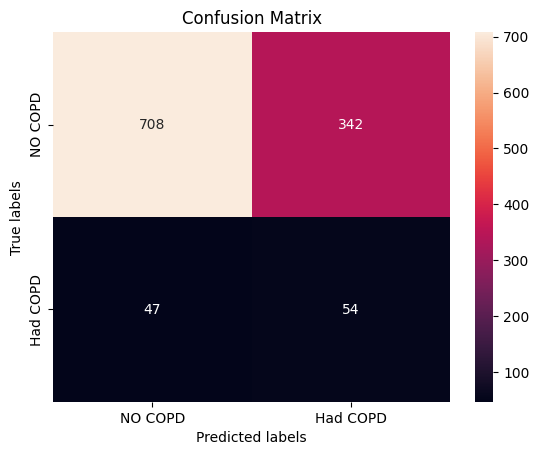

              precision    recall  f1-score   support

           0       0.94      0.67      0.78      1050
           1       0.14      0.53      0.22       101

    accuracy                           0.66      1151
   macro avg       0.54      0.60      0.50      1151
weighted avg       0.87      0.66      0.73      1151

Test Predictions: [0 0 1 ... 0 0 0]
Trained MSE: 0.36615566037735847 Test MSE: 0.33796698523023455


In [100]:
plot_confusion_matrix(Y_test, y_pred)
print(classification_report(Y_test, y_pred))
# We print the results
print("Test Predictions:", y_pred)
print("Trained MSE:", mse_train, "Test MSE:", mse_test)

As you may see, there is hardly a relation between aspects like depression and usage of Ecigarettes. The model in this case cannot predict properly the imbalance of that is in the columns hadCOPD. As a result, if maybe needed to understand if there are other variables or aspectos that can predict correctly when is that someone is going to have COPD. 